In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
def read_data():
  df = pd.read_csv('processed_data.csv')
  print(df.head())
  return df

def make_arrays(df):
  input_tweets = np.array(df['PlainText'])
  output = np.array(df['Annotation'])
  return input_tweets,output

In [3]:
df = read_data()
input_tweets,output = make_arrays(df)

                                           PlainText Annotation
0  not serve people doubtful citizenship illegal ...          U
1  sio delhi welcome delhi court decision dischar...          S
2  gandhi godse biggest propoganda movie ever see...          U
3  brother jail three year time several caa nrc a...          U
4  oci card holder allowed enter india oci caa nr...          N


In [4]:
count_dict = {}
max_len = 0
for ele in df['Annotation']:
    
    if ele in count_dict:
        count_dict[ele]+=1
    else:
        count_dict[ele] = 1
count_dict

{'U': 132, 'S': 182, 'N': 568}

In [5]:
df, test = train_test_split(df, test_size=0.2, random_state=42, shuffle=True)

input_tweets,output = make_arrays(df)
print(df)
print(test)

                                             PlainText Annotation
590  agnipath scheme imposed army say rahul gandhi ...          N
81   congress want make india ruined country opposi...          U
650  physiotherapist symbol hope resilience private...          N
361  ahmadis biggest supporter partition boo hoo pe...          N
549  ek akela desh ko loot raha h modi stopped pens...          U
..                                                 ...        ...
106  caa implementation nrc population control bill...          S
270  voted bjp agree alot policy felt modi really w...          U
860                              babus incompetent son          U
435  adhaar covered adult india adhaar valid docume...          U
102  need say pardon associated three local gaushal...          N

[705 rows x 2 columns]
                                             PlainText Annotation
44                                nimmasuresh caa nrc           N
334            close caa window year later conduct n

In [6]:
count_dict = {}
max_len = 0
for ele in df['Annotation']:
    
    if ele in count_dict:
        count_dict[ele]+=1
    else:
        count_dict[ele] = 1
count_dict

{'N': 443, 'U': 111, 'S': 151}

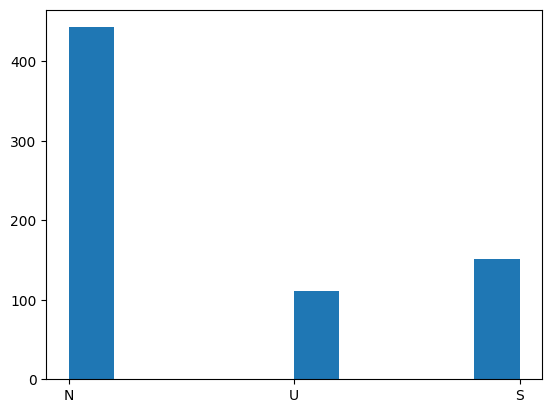

In [7]:
plt.hist(df['Annotation'])
plt.show() 

In [8]:
for sentence in input_tweets:
    x = sentence.split(' ')
    max_len = max(max_len,len(x))
print('Max Legth of the feature vector is : ',max_len)

Max Legth of the feature vector is :  229


In [9]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [12]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,classification_report
from scikitplot.metrics import plot_confusion_matrix

In [13]:
cv = CountVectorizer(ngram_range=(1,2))
traindata = cv.fit_transform(input_tweets)
X = traindata
y = df.Annotation

In [14]:
print(X)
print(X.shape)

  (0, 419)	1
  (0, 13315)	1
  (0, 6924)	1
  (0, 1007)	1
  (0, 13241)	1
  (0, 12194)	1
  (0, 5601)	1
  (0, 14249)	1
  (0, 10921)	1
  (0, 14184)	1
  (0, 13898)	1
  (0, 1639)	1
  (0, 7823)	1
  (0, 7587)	2
  (0, 8229)	1
  (0, 12677)	1
  (0, 15042)	1
  (0, 426)	1
  (0, 13346)	1
  (0, 6925)	1
  (0, 1040)	1
  (0, 13272)	1
  (0, 12195)	1
  (0, 5616)	1
  (0, 14255)	1
  :	:
  (703, 9700)	1
  (703, 9588)	1
  (703, 6767)	1
  (703, 3485)	1
  (704, 13241)	1
  (704, 10037)	1
  (704, 9685)	1
  (704, 15136)	1
  (704, 15472)	1
  (704, 6342)	1
  (704, 11588)	1
  (704, 8721)	1
  (704, 10914)	1
  (704, 1173)	1
  (704, 5629)	1
  (704, 10061)	1
  (704, 13265)	1
  (704, 10915)	1
  (704, 1174)	1
  (704, 15138)	1
  (704, 8725)	1
  (704, 5630)	1
  (704, 15473)	1
  (704, 6349)	1
  (704, 9703)	1
(705, 16695)


In [16]:
parameters = {'max_features': ('auto','sqrt'),
             'n_estimators': [25, 50, 75],
             'max_depth': [5, 10, None],
             'min_samples_split': [5, 10, 15],
             'min_samples_leaf': [1, 2, 5, 10],
             'bootstrap': [True, False],
             'class_weight':[{'U':4,'N':1,'S':2}]
             }

In [17]:
grid_search = GridSearchCV(RandomForestClassifier(),parameters,cv=5,return_train_score=True,n_jobs=-1)
grid_search.fit(X,y)
grid_search.best_params_

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


{'bootstrap': False,
 'class_weight': {'U': 4, 'N': 1, 'S': 2},
 'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 50}

In [18]:
for i in range(432):
    print('Parameters: ',grid_search.cv_results_['params'][i])
    print('Mean Test Score: ',grid_search.cv_results_['mean_test_score'][i])
    print('Rank: ',grid_search.cv_results_['rank_test_score'][i])

Parameters:  {'bootstrap': True, 'class_weight': {'U': 4, 'N': 1, 'S': 2}, 'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 25}
Mean Test Score:  0.6397163120567375
Rank:  193
Parameters:  {'bootstrap': True, 'class_weight': {'U': 4, 'N': 1, 'S': 2}, 'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Mean Test Score:  0.64822695035461
Rank:  138
Parameters:  {'bootstrap': True, 'class_weight': {'U': 4, 'N': 1, 'S': 2}, 'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 75}
Mean Test Score:  0.6581560283687943
Rank:  76
Parameters:  {'bootstrap': True, 'class_weight': {'U': 4, 'N': 1, 'S': 2}, 'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 25}
Mean Test Score:  0.64822695035461
Rank:  138
Parameters:  {'bootstrap': True, 'class_weight': {'U': 4, 'N': 1, 'S': 2}, 'max_dept

In [19]:
rfc = RandomForestClassifier(max_features=grid_search.best_params_['max_features'],
                                      max_depth=grid_search.best_params_['max_depth'],
                                      n_estimators=grid_search.best_params_['n_estimators'],
                                      min_samples_split=grid_search.best_params_['min_samples_split'],
                                      min_samples_leaf=grid_search.best_params_['min_samples_leaf'],
                                      bootstrap=grid_search.best_params_['bootstrap'],
                                      class_weight={'U':2.5,'N':1,'S':2})
rfc.fit(X,y)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(bootstrap=False, class_weight={'N': 1, 'S': 2, 'U': 2.5},
                       max_features='auto', min_samples_leaf=2,
                       min_samples_split=10, n_estimators=50)

In [20]:
X_test,y_test = test.PlainText,test.Annotation
test_df = y_test
#pre-processing of text
test_corpus = X_test
#convert text data into vectors
testdata = cv.transform(test_corpus)
#predict the target
predictions = rfc.predict(testdata)

Accuracy_score:  0.7288135593220338
Precision_score:  0.5449172576832152
Recall_score:  0.49385765488991296
--------------------------------------------------
              precision    recall  f1-score   support

           N       0.80      0.90      0.85       125
           S       0.50      0.39      0.44        31
           U       0.33      0.19      0.24        21

    accuracy                           0.73       177
   macro avg       0.54      0.49      0.51       177
weighted avg       0.69      0.73      0.71       177



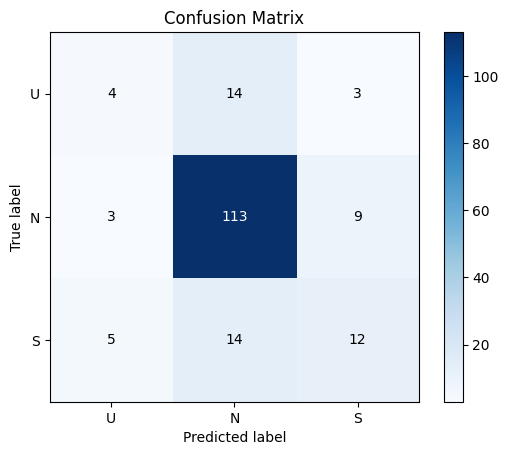

In [21]:
plot_confusion_matrix(y_test,predictions,labels=['U', 'N', 'S'])
acc_score = accuracy_score(y_test,predictions)
pre_score = precision_score(y_test,predictions,average='macro')
rec_score = recall_score(y_test,predictions,average='macro')
print('Accuracy_score: ',acc_score)
print('Precision_score: ',pre_score)
print('Recall_score: ',rec_score)
print("-"*50)
cr = classification_report(y_test,predictions)
print(cr)

In [24]:
y_score = rfc.predict_proba(testdata)

In [26]:
from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer().fit(y)
y_onehot_test = label_binarizer.transform(y_test)
y_onehot_test.shape 

(177, 3)

In [29]:
label_binarizer.transform(['N'])

array([[1, 0, 0]])

In [31]:
print(f"y_score:\n{y_score[0:2,:]}")
print()
print(f"y_score.ravel():\n{y_score[0:2,:].ravel()}")

y_score:
[[0.28679522 0.42510148 0.2881033 ]
 [0.36124201 0.32354464 0.31521335]]

y_score.ravel():
[0.28679522 0.42510148 0.2881033  0.36124201 0.32354464 0.31521335]


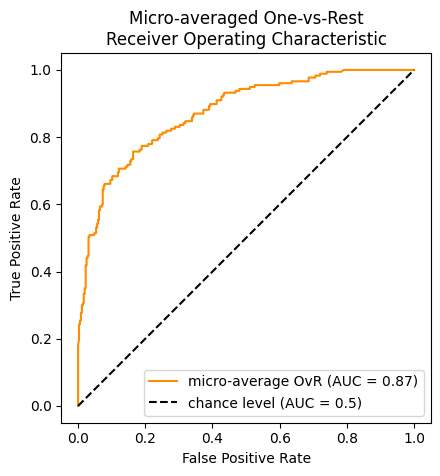

In [33]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(
    y_onehot_test.ravel(),
    y_score.ravel(),
    name="micro-average OvR",
    color="darkorange",
)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Micro-averaged One-vs-Rest\nReceiver Operating Characteristic")
plt.legend()
plt.show()